# Question 3.7 task (d)

In [1]:
import config as c
import numpy as np
import matplotlib.pyplot as plt
from simulation import solve_simulation
from opt_initial_values import inital_values
from opt_diags_gen import diags_gen_backwards_euler

from plots import plot_diff_times

# nicer looking default plots (according to your github)
plt.style.use('bmh')

In [2]:
Us = []
n_sim = 50+1
center = -17 * c.milli
sides = 5 * c.milli
v_values = np.linspace(center - sides, center + sides ,n_sim)

print("v_values",v_values)

for v_appl in v_values:
    inital_distr = inital_values(v_appl)
    Us.append(solve_simulation(inital_distr,diags_gen_backwards_euler,cutoff=True))

v_values [-0.022  -0.0218 -0.0216 -0.0214 -0.0212 -0.021  -0.0208 -0.0206 -0.0204
 -0.0202 -0.02   -0.0198 -0.0196 -0.0194 -0.0192 -0.019  -0.0188 -0.0186
 -0.0184 -0.0182 -0.018  -0.0178 -0.0176 -0.0174 -0.0172 -0.017  -0.0168
 -0.0166 -0.0164 -0.0162 -0.016  -0.0158 -0.0156 -0.0154 -0.0152 -0.015
 -0.0148 -0.0146 -0.0144 -0.0142 -0.014  -0.0138 -0.0136 -0.0134 -0.0132
 -0.013  -0.0128 -0.0126 -0.0124 -0.0122 -0.012 ]


V_appl = -21.80 mV


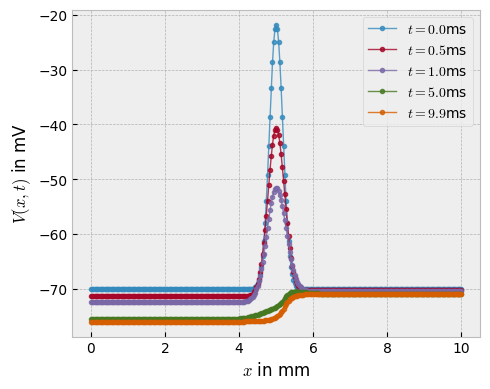

V_appl = -12.00 mV


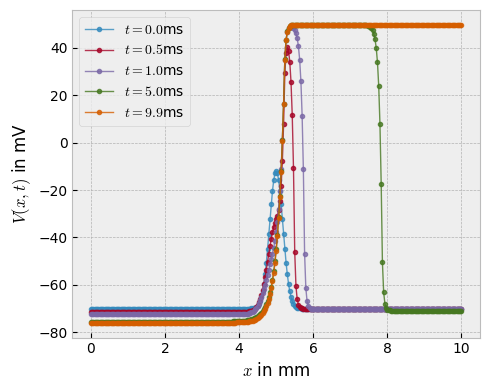

In [3]:
ts = [0,50,100,500,c.n_t-10]
filenames = ["v_appl_cutoff_low","v_appl_cutoff_high"]

for i_v_appl,filename in zip([1,-1],filenames):
    U = Us[i_v_appl]
    print(f"V_appl = {v_values[i_v_appl]/c.milli:.2f} mV")
    plot_diff_times(
        U,
        t_diff_times=ts,
        log=False,
        alpha=0.8,
        legend=True,
        filename=filename
        )

after 9.99 ms


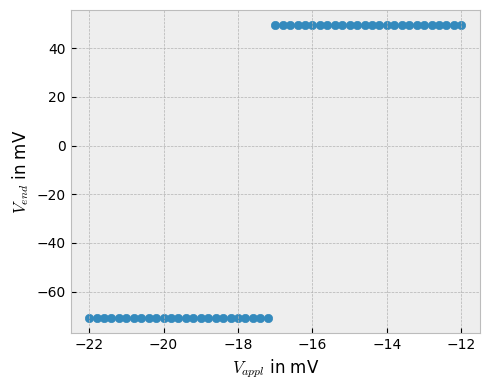

In [4]:
# plot endvoltage against v_appl
# volatage in the middle at the end
endvoltages = []
i_t = c.n_t-1
print("after",i_t*c.delta_t/c.milli,"ms")
for U in Us:

    endvoltages += [U[i_t,int(c.n_x*3/4)]]

plt.style.use('bmh')
plt.figure(figsize=(5,4))
plt.scatter(v_values/c.milli,np.array(endvoltages)/c.milli)
plt.ylabel("$V_{end}$ in mV")
plt.xlabel("$V_{appl}$ in mV")
#plt.axvline(c.v_mem,label="$V_{mem}$",alpha=0.5)
plt.tight_layout()
#plt.legend()
plt.show()

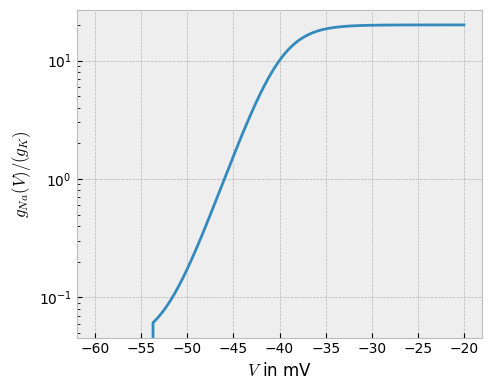

In [5]:
from opt_right_side_functions import g_na_g_k_cutoff
center = -40 *c.milli
sides = 20 * c.milli
x = np.linspace(center - sides, center + sides ,1000)
#x = np.linspace(-1e3,1e4,1000)

plt.style.use('bmh')
plt.figure(figsize=(5,4))
plt.plot(x/c.milli,g_na_g_k_cutoff(x))
plt.ylabel("$g_{Na}(V)/(g_K)$")
plt.xlabel("$V$ in mV")
plt.tight_layout()
plt.yscale("log")
plt.savefig("images/g_na_vs_v_cutoff.pdf")
plt.show()
